In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr

In [2]:
def best_fit(X, Y):
    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)
    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar
    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))
    return a, b

In [3]:
import re
w = open("bndgb2.txt", "r", encoding="utf-8")
w.read()
w = '  40.00   69.50\n  40.30   68.00\n  40.40   67.50\n  40.60   67.00\n  40.80   66.50\n  41.45   66.00\n  41.80   65.70\n  42.10   66.00\n  42.10   67.00\n  42.10   67.50\n  41.80   68.00\n  41.10   69.00\n  41.00   69.50\n  40.00   69.50\n'
output1w = w.split('\n')

neww = [] 
for string in output1w:
    output2w = string.split(' ')
    neww.append(output2w)

neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []

for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']

In [4]:
polygon_w = Polygon(df_w.values)
print(polygon_w)

POLYGON ((69.5 40, 68 40.3, 67.5 40.4, 67 40.6, 66.5 40.8, 66 41.45, 65.7 41.8, 66 42.1, 67 42.1, 67.5 42.1, 68 41.8, 69 41.1, 69.5 41, 69.5 40))


In [22]:
filelen = []; years = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
#         if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_w.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [23]:
years = [1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [24]:
df = pd.DataFrame(index=years, 
                  data={'Bottle': Bottles,'MK-3': MK3, 
                        'SBE-17': SBE17,'SBE-19': SBE19,
                        'SBE-19+V2': SBE19V2,'SBE-911+': SBE911,
                        'SBE-19+': SBE19plus,'MK-5': MK5})

In [66]:
filelen = []
Bottles = []; MK3 = []
SBE17 = []; SBE19 = []
MK5 = []; SBE19V2 = []
SBE911 = []; SBE19plus = []

for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = [];gear_intermediate = []
    Bottles_intermediate = []; MK3_intermediate = []
    SBE17_intermediate = []; SBE19_intermediate = []
    MK5_intermediate = []; SBE19V2_intermediate = []
    SBE911_intermediate = []; SBE19plus_intermediate = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 334 and yd <= 365:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            yd_intermediate.append(npfile[i]['yd'])
            gear_intermediate.append(npfile[i]['gear'])
            
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'gear': gear_intermediate})
#     print(month_df)
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if polygon_w.contains(point) == True:
            a = month_df['gear'].iloc[ii]
#             print(a)
            if a == 'Bottle':
                Bottles_intermediate.append(i)
            if a == 'MK-3':
                MK3_intermediate.append(i)
            if a == 'SBE-17':
                SBE17_intermediate.append(i)
            if a == 'SBE-19':
                SBE19_intermediate.append(i)
            if a == 'MK-5':
                MK5_intermediate.append(i)
            if a == 'SBE-19+V2':
                SBE19V2_intermediate.append(i)
            if a == 'SBE-911+':
                SBE911_intermediate.append(i)
            if a == 'SBE-19+':
                SBE19plus_intermediate.append(i)
    Bottles.append(len(Bottles_intermediate))
    MK3.append(len(MK3_intermediate))
    SBE17.append(len(SBE17_intermediate))
    SBE19.append(len(SBE19_intermediate))
    MK5.append(len(MK5_intermediate))
    SBE19V2.append(len(SBE19V2_intermediate))
    SBE911.append(len(SBE911_intermediate))
    SBE19plus.append(len(SBE19plus_intermediate))

In [67]:
print(sum(Bottles))
print(sum(MK3))
print(sum(SBE17))
print(sum(SBE19))
print(sum(MK5))
print(sum(SBE19V2))
print(sum(SBE911))
print(sum(SBE19plus))

116
0
141
273
0
0
0
43


In [68]:
Bottlemonth = [91, 57, 103, 53, 187, 83, 38, 85, 75, 80, 158, 116]
MK3month = [0, 0, 0, 7, 0, 0, 0, 13, 13, 0, 31, 0]
SBE17month = [58, 0, 0, 0, 27, 0, 0, 0, 30, 0, 87, 141]
SBE19month = [583, 774, 461, 1449, 1433, 690, 357, 1201, 275, 861, 555, 273]
SBE19V2month = [68, 107, 117, 107, 554, 149, 29, 0, 0, 0, 18, 0]
SBE911plusmonth = [0, 28, 28, 176, 209, 32, 11, 106, 6, 178, 79, 0]
SBE19plusmonth = [17, 53, 32, 129, 118, 233, 111, 47, 31, 156, 32, 0]
MK5month = [10, 139, 50, 237, 115, 210, 93, 506, 134, 479, 214, 43]

In [69]:
dfmonth = pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10,11,12], 
                  data={'Bottle': Bottlemonth,'MK-3': MK3month, 
                        'SBE-17': SBE17month,'SBE-19': SBE19month,
                        'SBE-19+V2': SBE19V2month,'SBE-911+': SBE911plusmonth,
                        'SBE-19+': SBE19plusmonth,'MK-5': MK5month})

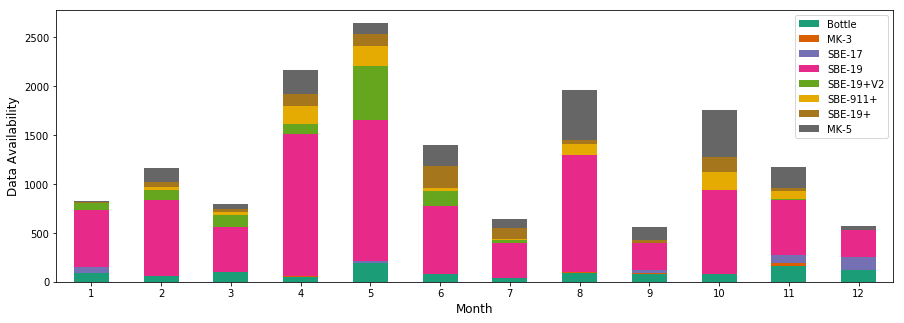

In [71]:
ax = dfmonth.plot(kind="bar", stacked=True, cmap = 'Dark2') #tab10
plt.gcf().set_size_inches(15, 5)
# plt.title('Data Collection Methods', fontsize = 20)
plt.xticks(rotation = 360)
plt.xlabel('Month',fontsize=12); plt.ylabel('Data Availability',fontsize=12)
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig('ANNUALtrend_datacollection_count_GB')
plt.show()

In [82]:
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
        if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
#         if yd > 243 and yd <= 334:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
#         if type(month_df['p'].iloc[ii]) != int or type(month_df['p'].iloc[ii]) != float or type(month_df['t'].iloc[ii]) != int or type(month_df['t'].iloc[ii]) != float:
            pass
        elif polygon_w.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                    break  
    monthly = []
    if len(seasonyeartemp) > 0:
        print('depth_',year,np.mean(seasonyeardepth))
#         print('stddepth_',year,np.std(seasonyeardepth))

depth_ 1977 36.666666666666664
depth_ 1979 53.6875
depth_ 1980 41.58620689655172
depth_ 1981 50.95652173913044
depth_ 1982 48.333333333333336
depth_ 1983 44.17307692307692
depth_ 1984 51.611111111111114
depth_ 1985 58.93939393939394
depth_ 1986 42.65714285714286
depth_ 1987 53.132075471698116
depth_ 1988 50.967213114754095
depth_ 1989 50.208695652173915
depth_ 1990 53.08588957055215
depth_ 1991 48.48341232227488
depth_ 1992 45.672955974842765
depth_ 1993 45.735849056603776
depth_ 1994 44.23456790123457
depth_ 1995 56.26829268292683
depth_ 1996 56.40816326530612
depth_ 1997 55.02402597402598
depth_ 1998 52.487946428571426
depth_ 1999 45.89047619047619
depth_ 2000 26.5
depth_ 2001 52.46666666666667
depth_ 2002 54.85
depth_ 2003 58.04545454545455
depth_ 2004 39.5
depth_ 2005 49.628571428571426
depth_ 2006 52.08108108108108
depth_ 2007 47.333333333333336
depth_ 2008 50.0
depth_ 2009 44.15384615384615
depth_ 2010 42.265306122448976
depth_ 2011 45.41538461538462
depth_ 2012 46.46875
depth_ 2

### SPRING

In [122]:
depth_1978 = 44.07692307692308
depth_1979 = 28.821428571428573
depth_1980 = 44.296875
depth_1981 = 40.275
depth_1982 = 36.94915254237288
depth_1984 = 23.032258064516128
depth_1985 = 39.046875
depth_1986 = 34.76
depth_1987 = 50.18518518518518
depth_1990 = 38.87700534759358
depth_1991 = 50.58974358974359
depth_1992 = 32.48262548262548
depth_1993 = 29.375
depth_1994 = 30.048517520215633
depth_1995 = 43.99818511796733
depth_1996 = 48.618581907090466
depth_1997 = 44.341843971631214
depth_1998 = 47.64550898203593
depth_1999 = 41.78190255220418
depth_2000 = 52.12280701754386
depth_2001 = 41.97014925373134
depth_2002 = 43.8051948051948
depth_2003 = 40.73809523809524
depth_2004 = 37.859154929577464
depth_2005 = 40.275862068965516
depth_2006 = 39.82089552238806
depth_2007 = 42.14473684210526
depth_2008 = 46.48051948051948
depth_2009 = 46.43103448275862
depth_2010 = 43.72727272727273
depth_2011 = 43.267857142857146
depth_2012 = 43.74626865671642
depth_2013 = 48.91304347826087
depth_2014 = 44.37234042553192
depth_2015 = 39.38297872340426
depth_2016 = 38.23076923076923
depth_2017 = 40.97826086956522
depth_2018 = 42.93333333333333
depth_2019 = 37.129629629629626

In [123]:
stddepth_1978 = 72.71013212482471
stddepth_1979 = 26.202581077100803
stddepth_1980 = 22.41559145403875
stddepth_1981 = 20.88418959404458
stddepth_1982 = 30.866263591425753
stddepth_1984 = 35.581332429826034
stddepth_1985 = 32.65177526160522
stddepth_1986 = 30.905378172738803
stddepth_1987 = 33.706837461149824
stddepth_1990 = 29.207186420907437
stddepth_1991 = 22.91983571418048
stddepth_1992 = 21.91495247865233
stddepth_1993 = 21.91189007648902
stddepth_1994 = 22.36641245613719
stddepth_1995 = 23.158923763470675
stddepth_1996 = 24.989704421708694
stddepth_1997 = 25.9165365375722
stddepth_1998 = 23.634179822423746
stddepth_1999 = 22.59239851424002
stddepth_2000 = 19.622820742060465
stddepth_2001 = 21.131408433083276
stddepth_2002 = 21.862640232805
stddepth_2003 = 20.71640656904056
stddepth_2004 = 21.700454836959672
stddepth_2005 = 21.91267394521378
stddepth_2006 = 22.014869719130257
stddepth_2007 = 23.043268195750237
stddepth_2008 = 19.889702608636714
stddepth_2009 = 21.785879695395806
stddepth_2010 = 23.513597261974766
stddepth_2011 = 21.206881524156064
stddepth_2012 = 20.986380291009414
stddepth_2013 = 19.813433541621567
stddepth_2014 = 34.62442381195162
stddepth_2015 = 32.602736598028066
stddepth_2016 = 37.87337982552236
stddepth_2017 = 23.23461541530577
stddepth_2018 = 40.37138700724671
stddepth_2019 = 26.308037284996228

best fit line:
y = -235.30 + 0.14x


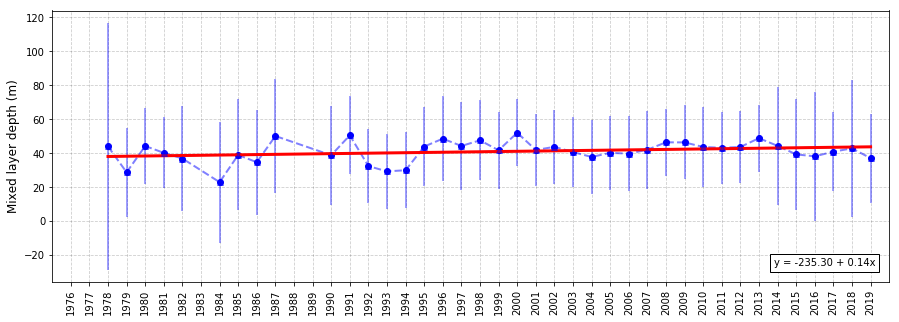

In [132]:
from matplotlib.offsetbox import AnchoredText

x = [1978, 1979,1980,1981,1982,1984,1985,1986,1987,1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
    2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y = [depth_1978, depth_1979, depth_1980, depth_1981, depth_1982, depth_1984,
    depth_1985, depth_1986, depth_1987, depth_1990, depth_1991, depth_1992, depth_1993,
    depth_1994, depth_1995,depth_1996,depth_1997,depth_1998, depth_1999,depth_2000,depth_2001,
    depth_2002,depth_2003,depth_2004,depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011, depth_2012, depth_2013, depth_2014, depth_2015, depth_2016, depth_2017, depth_2018, depth_2019]
e = [stddepth_1978, stddepth_1979, stddepth_1980, stddepth_1981, stddepth_1982, stddepth_1984,
    stddepth_1985, stddepth_1986, stddepth_1987, stddepth_1990, stddepth_1991, stddepth_1992, stddepth_1993,
    stddepth_1994, stddepth_1995,stddepth_1996,stddepth_1997,stddepth_1998, stddepth_1999,stddepth_2000,stddepth_2001,
    stddepth_2002,stddepth_2003,stddepth_2004,stddepth_2005,stddepth_2006,stddepth_2007,stddepth_2008,stddepth_2009,stddepth_2010,
    stddepth_2011, stddepth_2012, stddepth_2013, stddepth_2014, stddepth_2015, stddepth_2016, stddepth_2017, stddepth_2018, stddepth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,100))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -235.30 + 0.14x".format(3), loc=4, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_spring_GB_withstd')
plt.show()

### SUMMER

In [133]:
depth_1977 = 8.54054054054054
depth_1978 = 12.91304347826087
depth_1979 = 14.2
depth_1980 = 20.727272727272727
depth_1981 = 26.583333333333332
depth_1982 = 20.083333333333332
depth_1983 = 19.68
depth_1986 = 16.125
depth_1991 = 19.23076923076923
depth_1992 = 25.2
depth_1993 = 34.529411764705884
depth_1994 = 26.292237442922374
depth_1995 = 27.04368932038835
depth_1996 = 26.756302521008404
depth_1997 = 20.541040462427745
depth_1998 = 20.442748091603054
depth_1999 = 23.4251497005988
depth_2000 = 25.21904761904762
depth_2001 = 19.127906976744185
depth_2002 = 17.155844155844157
depth_2003 = 15.233333333333333
depth_2004 = 26.275862068965516
depth_2005 = 18.63736263736264
depth_2006 = 19.761904761904763
depth_2007 = 19.333333333333332
depth_2008 = 20.64516129032258
depth_2009 = 27.491803278688526
depth_2010 = 28.666666666666668
depth_2011 = 27.93220338983051
depth_2012 = 20.359375
depth_2013 = 18.30952380952381
depth_2014 = 16.821428571428573
depth_2015 = 19.923076923076923
depth_2016 = 24.428571428571427
depth_2017 = 22.8125
depth_2018 = 18.90625
depth_2019 = 23.870967741935484

In [134]:
stddepth_1977 = 15.064894927190014
stddepth_1978 = 9.627465436823966
stddepth_1979 = 15.082250684638739
stddepth_1980 = 20.973681527199933
stddepth_1981 = 22.985351615515672
stddepth_1982 = 14.482508607128654
stddepth_1983 = 17.831926424253773
stddepth_1986 = 22.121468644735142
stddepth_1991 = 15.969460499310967
stddepth_1992 = 17.99777764058663
stddepth_1993 = 36.63390850830902
stddepth_1994 = 18.34142164506028
stddepth_1995 = 25.6491078211306
stddepth_1996 = 28.86405877297331
stddepth_1997 = 20.878890882098382
stddepth_1998 = 15.732938319753988
stddepth_1999 = 23.782801410718243
stddepth_2000 = 31.43488536865674
stddepth_2001 = 15.36592160535919
stddepth_2002 = 14.435764510917792
stddepth_2003 = 12.73887314046611
stddepth_2004 = 33.94745420860514
stddepth_2005 = 16.510081158416668
stddepth_2006 = 20.514581949490424
stddepth_2007 = 15.861343644919314
stddepth_2008 = 17.893138686959304
stddepth_2009 = 19.44218523452395
stddepth_2010 = 33.06375842538354
stddepth_2011 = 32.03645402772437
stddepth_2012 = 15.511454625836192
stddepth_2013 = 15.215887835758567
stddepth_2014 = 14.5848590066856
stddepth_2015 = 16.970388411590253
stddepth_2016 = 19.867931293356918
stddepth_2017 = 30.39781807548035
stddepth_2018 = 17.223456706988294
stddepth_2019 = 14.218892328992283

best fit line:
y = -178.49 + 0.10x


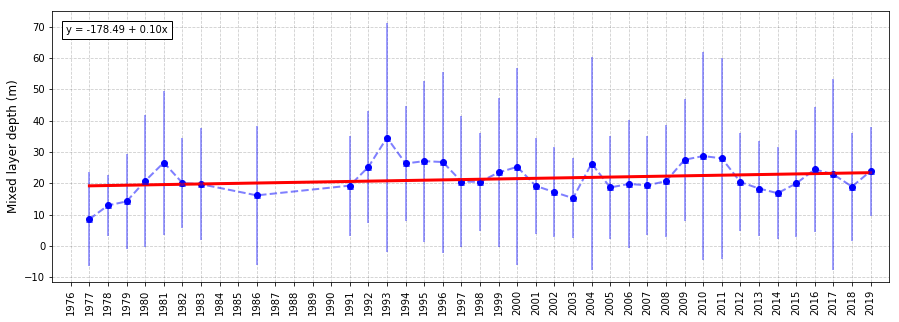

In [138]:
from matplotlib.offsetbox import AnchoredText

x = [1977,1978, 1979,1980,1981,1982,1983,1986,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
    2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
y = [depth_1977,depth_1978, depth_1979, depth_1980, depth_1981, depth_1982, depth_1983, 
    depth_1986, depth_1991, depth_1992, depth_1993,
    depth_1994, depth_1995,depth_1996,depth_1997,depth_1998, depth_1999,depth_2000,depth_2001,
    depth_2002,depth_2003,depth_2004,depth_2005,depth_2006,depth_2007,depth_2008,depth_2009,depth_2010,
    depth_2011, depth_2012, depth_2013, depth_2014, depth_2015, depth_2016, depth_2017, depth_2018, depth_2019]
e = [stddepth_1977,stddepth_1978, stddepth_1979, stddepth_1980, stddepth_1981, stddepth_1982, stddepth_1983, 
    stddepth_1986, stddepth_1991, stddepth_1992, stddepth_1993,
    stddepth_1994, stddepth_1995,stddepth_1996,stddepth_1997,stddepth_1998, stddepth_1999,stddepth_2000,stddepth_2001,
    stddepth_2002,stddepth_2003,stddepth_2004,stddepth_2005,stddepth_2006,stddepth_2007,stddepth_2008,stddepth_2009,stddepth_2010,
    stddepth_2011, stddepth_2012, stddepth_2013, stddepth_2014, stddepth_2015, stddepth_2016, stddepth_2017, stddepth_2018, stddepth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((0,100))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = -178.49 + 0.10x".format(3), loc=2, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_summer_GB_withstd')
plt.show()

### FALL

In [139]:
depth_1977 = 39.44736842105263
depth_1978 = 31.25
depth_1979 = 25.25
depth_1980 = 28.035714285714285
depth_1981 = 45.3
depth_1982 = 32.71052631578947
depth_1984 = 35.21052631578947
depth_1985 = 32.6271186440678
depth_1986 = 34.24418604651163
depth_1987 = 24.033333333333335
depth_1988 = 45.03703703703704
depth_1989 = 41.58490566037736
depth_1990 = 41.08791208791209
depth_1991 = 33.50420168067227
depth_1992 = 38.846846846846844
depth_1993 = 36.12396694214876
depth_1994 = 43.824175824175825
depth_1995 = 30.15625
depth_1996 = 31.177777777777777
depth_1997 = 36.338235294117645
depth_1998 = 35.41836734693877
depth_1999 = 44.9054054054054
depth_2000 = 27.204301075268816
depth_2001 = 32.417391304347824
depth_2002 = 35.845360824742265
depth_2003 = 27.68918918918919
depth_2004 = 32.0948275862069
depth_2005 = 30.372549019607842
depth_2006 = 20.829268292682926
depth_2007 = 22.77906976744186
depth_2008 = 29.463636363636365
depth_2009 = 33.3671875
depth_2010 = 38.81182795698925
depth_2011 = 37.52577319587629
depth_2012 = 34.75238095238095
depth_2013 = 47.0
depth_2014 = 39.457142857142856
depth_2015 = 36.7979797979798
depth_2016 = 37.12280701754386
depth_2017 = 33.76923076923077
depth_2018 = 27.181818181818183
depth_2019 = 39.82795698924731

In [140]:
stddepth_1977 = 33.591741911573145
stddepth_1978 = 16.683041198665297
stddepth_1979 = 14.021985288416595
stddepth_1980 = 18.327345187796652
stddepth_1981 = 20.119890655766497
stddepth_1982 = 23.641965247745865
stddepth_1984 = 21.989420775427014
stddepth_1985 = 25.503670925591063
stddepth_1986 = 24.142954119987166
stddepth_1987 = 15.808190563403798
stddepth_1988 = 12.446869252298484
stddepth_1989 = 15.55323658880448
stddepth_1990 = 17.448604813174533
stddepth_1991 = 17.10662260552118
stddepth_1992 = 17.06753844102903
stddepth_1993 = 17.56431875576958
stddepth_1994 = 22.34720692363516
stddepth_1995 = 17.907940583369715
stddepth_1996 = 20.590492831929215
stddepth_1997 = 17.70145415605041
stddepth_1998 = 21.654015732294184
stddepth_1999 = 18.79129249105274
stddepth_2000 = 18.52029351342284
stddepth_2001 = 21.392393044052568
stddepth_2002 = 26.55953833213592
stddepth_2003 = 18.20151885233139
stddepth_2004 = 20.6835677107731
stddepth_2005 = 19.28116096121556
stddepth_2006 = 13.227654768858939
stddepth_2007 = 14.18187605491576
stddepth_2008 = 18.5798900440661
stddepth_2009 = 21.474138186196058
stddepth_2010 = 23.49312573655594
stddepth_2011 = 29.84430138959691
stddepth_2012 = 18.21238770067333
stddepth_2013 = 22.26784998281475
stddepth_2014 = 21.143063062060296
stddepth_2015 = 17.175258101940674
stddepth_2016 = 16.364349543452732
stddepth_2017 = 27.424732930903097
stddepth_2018 = 15.810342885236876
stddepth_2019 = 16.763775369626956

best fit line:
y = 34.21 + 0.00x


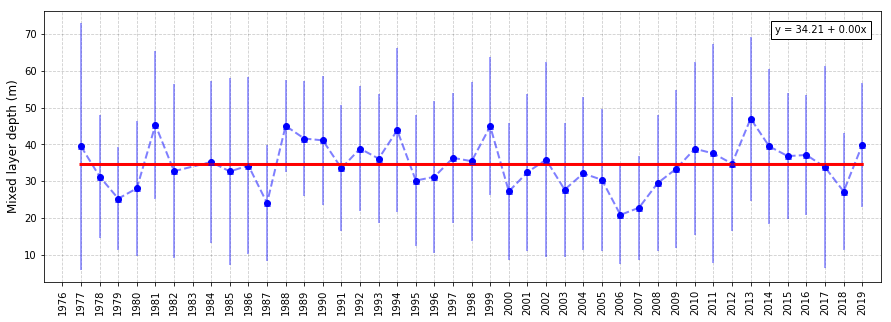

In [147]:
from matplotlib.offsetbox import AnchoredText

x = [1977, 1978, 1979, 1980, 1981, 1982, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 
    1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
    2014, 2015, 2016, 2017, 2018, 2019]
y = [depth_1977, depth_1978, depth_1979, depth_1980, depth_1981, depth_1982, depth_1984, depth_1985, depth_1986,
    depth_1987, depth_1988, depth_1989, depth_1990, depth_1991, depth_1992, depth_1993, depth_1994, depth_1995,
    depth_1996, depth_1997, depth_1998, depth_1999, depth_2000, depth_2001,depth_2002, depth_2003, depth_2004,
    depth_2005, depth_2006, depth_2007, depth_2008, depth_2009, depth_2010, depth_2011, depth_2012, depth_2013,
    depth_2014, depth_2015, depth_2016, depth_2017, depth_2018, depth_2019]
e = [stddepth_1977, stddepth_1978, stddepth_1979, stddepth_1980, stddepth_1981, stddepth_1982, stddepth_1984, stddepth_1985, stddepth_1986,
    stddepth_1987, stddepth_1988, stddepth_1989, stddepth_1990, stddepth_1991, stddepth_1992, stddepth_1993, stddepth_1994, stddepth_1995,
    stddepth_1996, stddepth_1997, stddepth_1998, stddepth_1999, stddepth_2000, stddepth_2001,stddepth_2002, stddepth_2003, stddepth_2004,
    stddepth_2005, stddepth_2006, stddepth_2007, stddepth_2008, stddepth_2009, stddepth_2010, stddepth_2011, stddepth_2012, stddepth_2013,
    stddepth_2014, stddepth_2015, stddepth_2016, stddepth_2017, stddepth_2018, stddepth_2019]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((5,85))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = 34.21 + 0.00x".format(3), loc=1, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_fall_GB_withstd')
plt.show()

### WINTER

In [151]:
depth_1977 = 36.666666666666664
depth_1979 = 53.6875
depth_1980 = 41.58620689655172
depth_1981 = 50.95652173913044
depth_1982 = 48.333333333333336
depth_1983 = 44.17307692307692
depth_1984 = 51.611111111111114
depth_1985 = 58.93939393939394
depth_1986 = 42.65714285714286
depth_1987 = 53.132075471698116
depth_1988 = 50.967213114754095
depth_1989 = 50.208695652173915
depth_1990 = 53.08588957055215
depth_1991 = 48.48341232227488
depth_1992 = 45.672955974842765
depth_1993 = 45.735849056603776
depth_1994 = 44.23456790123457
depth_1995 = 56.26829268292683
depth_1996 = 56.40816326530612
depth_1997 = 55.02402597402598
depth_1998 = 52.487946428571426
depth_1999 = 45.89047619047619
depth_2000 = 26.5
depth_2001 = 52.46666666666667
depth_2002 = 54.85
depth_2003 = 58.04545454545455
depth_2004 = 39.5
depth_2005 = 49.628571428571426
depth_2006 = 52.08108108108108
depth_2007 = 47.333333333333336
depth_2008 = 50.0
depth_2009 = 44.15384615384615
depth_2010 = 42.265306122448976
depth_2011 = 45.41538461538462
depth_2012 = 46.46875
depth_2013 = 50.708333333333336
depth_2017 = 53.0625

In [152]:
stddepth_1977 = 18.856180831641264
stddepth_1979 = 30.347402586547666
stddepth_1980 = 20.62726224396567
stddepth_1981 = 25.62009785283143
stddepth_1982 = 11.897712198383164
stddepth_1983 = 21.55022858512192
stddepth_1984 = 24.095040727384568
stddepth_1985 = 41.00919290431102
stddepth_1986 = 22.4498715963784
stddepth_1987 = 37.81735537277204
stddepth_1988 = 17.048597089645643
stddepth_1989 = 16.852555296981144
stddepth_1990 = 17.666438589300423
stddepth_1991 = 18.552179767834485
stddepth_1992 = 16.19864768614025
stddepth_1993 = 19.221140363092903
stddepth_1994 = 20.032856717654642
stddepth_1995 = 17.85719010786644
stddepth_1996 = 21.122739818563602
stddepth_1997 = 17.699659014966322
stddepth_1998 = 23.057470653254697
stddepth_1999 = 31.58514425910511
stddepth_2000 = 12.257650672131263
stddepth_2001 = 18.762965887324125
stddepth_2002 = 24.121100721152843
stddepth_2003 = 83.26872012986699
stddepth_2004 = 26.370754002619393
stddepth_2005 = 17.481558796605743
stddepth_2006 = 22.509311440689746
stddepth_2007 = 3.901566636906542
stddepth_2008 = 17.18041520646887
stddepth_2009 = 20.31487829347977
stddepth_2010 = 35.204809220520254
stddepth_2011 =21.57198490042997
stddepth_2012 = 16.571783954586785
stddepth_2013 = 17.53444031676581
stddepth_2017 = 15.217049442976782

best fit line:
y = 35.86 + 0.01x


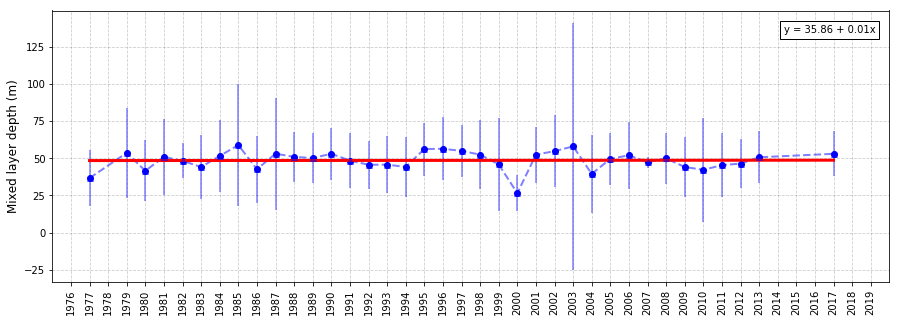

In [154]:
from matplotlib.offsetbox import AnchoredText

x = [1977, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
    1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2017]
y = [depth_1977, depth_1979, depth_1980, depth_1981, depth_1982, depth_1983, depth_1984, depth_1985, depth_1986,
    depth_1987, depth_1988, depth_1989, depth_1990, depth_1991, depth_1992, depth_1993, depth_1994, depth_1995, 
    depth_1996, depth_1997, depth_1998, depth_1999, depth_2000, depth_2001, depth_2002, depth_2003, depth_2004,
    depth_2005, depth_2006, depth_2007, depth_2008, depth_2009, depth_2010, depth_2011, depth_2012, depth_2013, depth_2017]
e = [stddepth_1977, stddepth_1979, stddepth_1980, stddepth_1981, stddepth_1982, stddepth_1983, stddepth_1984, stddepth_1985, stddepth_1986,
    stddepth_1987, stddepth_1988, stddepth_1989, stddepth_1990, stddepth_1991, stddepth_1992, stddepth_1993, stddepth_1994, stddepth_1995, 
    stddepth_1996, stddepth_1997, stddepth_1998, stddepth_1999, stddepth_2000, stddepth_2001, stddepth_2002, stddepth_2003, stddepth_2004,
    stddepth_2005, stddepth_2006, stddepth_2007, stddepth_2008, stddepth_2009, stddepth_2010, stddepth_2011, stddepth_2012, stddepth_2013, stddepth_2017]

plt.figure(figsize=(15, 5))
plt.xlim((1975,2020))
# plt.ylim((5,85))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# plt.xlabel('Year', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
plt.plot(x, yfit)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),c='red',linewidth = 3)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1976,1977,1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 
     1988, 1989,1990,1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 
     1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
     2011, 2012,2013,2014,2015,2016,2017,2018,2019], rotation='vertical')
# plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.errorbar(x, y, e, linestyle='None', marker='^',color='blue',alpha= 0.5)
a = AnchoredText("y = 35.86 + 0.01x".format(3), loc=1, pad=0.4, borderpad=1)
plt.gca().add_artist(a)
plt.savefig('timeseries_fall_GB_withstd')
plt.show()

### SEASONAL CYCLE

In [109]:
for year in range(1977,2020):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []
    seasonyeardepth = []; seasonyeartemp = []
        
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        floordepth = npfile[i]['depth']
#         if yd > 334 and yd <= 365 or yd >= 0 and yd <= 59:
        if yd > 334 and yd <= 365:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
#         if type(month_df['p'].iloc[ii]) != int or type(month_df['p'].iloc[ii]) != float or type(month_df['t'].iloc[ii]) != int or type(month_df['t'].iloc[ii]) != float:
            pass
        elif polygon_w.contains(point) == True:
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'lat': month_df['t'].iloc[ii]}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6]
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for ii in range(len(l)):
                    val = df_final[1][ii]
                    numrange.append(ii)
                    surfaceval.append(val)
            surfacevalmean = statistics.mean(surfaceval)
            tempfin = []
            pressurefin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
            d = {'temp': list(reversed(tempfin)), 'pressure': list(reversed(pressurefin))}
            dffin = pd.DataFrame(d)
            pnew = []; allmixedcount = []
            inconclusivecount = []
            for i in range(len(dffin)):
                b = dffin.at[i,'temp']
                if b <= (surfacevalmean + 0.2) and b >= (surfacevalmean - 0.2):
                    if dffin.at[i,'pressure'] >= floordepth - 6:
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                    else:
                        pnew.append(dffin.at[i,'pressure'])
                        seasonyeartemp.append(dffin.at[i,'temp'])
                        seasonyeardepth.append(dffin.at[i,'pressure'])
                        np.array(seasonyeartemp)
                        np.array(seasonyeardepth)
                    break  
    monthly = []
    if len(seasonyeartemp) > 0:
        print(np.mean(seasonyeardepth), ',')
#         print(np.std(seasonyeardepth), ',')


# highly.append(np.mean(seasonyeardepth))
#         monthly.append(seasonyeardepth)
# print(monthly)
#         print('depth_',year,np.mean(seasonyeardepth))
#         print('stddepth_',year,np.std(seasonyeardepth))

36.666666666666664 ,
53.6875 ,
40.035714285714285 ,
48.5625 ,
48.333333333333336 ,
45.851851851851855 ,
58.0 ,
92.5 ,
44.0 ,
64.26086956521739 ,
50.967213114754095 ,
50.19298245614035 ,
53.73529411764706 ,
49.614285714285714 ,
47.898305084745765 ,
49.95890410958904 ,
83.0 ,
36.46666666666667 ,
34.392857142857146 ,


In [114]:
january = statistics.mean([40.09090909090909 ,
49.15384615384615 ,
54.310344827586206 ,
49.785714285714285 ,
50.224137931034484 ,
52.265625 ,
47.875 ,
45.513513513513516 ,
43.70422535211268 ,
48.875 ,
58.9375 ,
59.666666666666664 ,
59.2423076923077 ,
48.00322580645162 ,
52.50632911392405 ,
49.9375 ,
57.76190476190476 ,
19.0 ,
41.0 ,
45.2 ])

february = statistics.mean([85.0 ,
56.42857142857143 ,
59.0 ,
36.0 ,
44.6 ,
53.354838709677416 ,
47.971014492753625 ,
41.07692307692308 ,
34.8 ,
38.625 ,
55.621212121212125 ,
53.80733944954128 ,
54.1671875 ,
55.67175572519084 ,
41.900763358778626 ,
26.5 ,
52.46666666666667 ,
74.5 ,
64.0 ,
39.5 ,
50.529411764705884 ,
53.42424242424242 ,
47.333333333333336 ,
51.84615384615385 ,
44.15384615384615 ,
44.8235294117647 ,
53.75675675675676 ,
46.46875 ,
50.708333333333336 ,
53.0625])


march = statistics.mean([57.5 ,
56.8 ,
47.55813953488372 ,
40.95238095238095 ,
45.61538461538461 ,
42.0 ,
52.08 ,
56.354838709677416 ,
53.30927835051546 ,
52.564516129032256 ,
51.010784313725495 ,
51.48869565217392 ,
47.12903225806452 ,
36.2 ,
49.15384615384615 ,
38.0 ,
37.75 ,
49.833333333333336 ,
50.0 ,
61.25 ,
47.625])

april = statistics.mean([32.5 ,
39.526315789473685 ,
51.0 ,
40.166666666666664 ,
40.85964912280702 ,
47.92857142857143 ,
43.88636363636363 ,
43.660377358490564 ,
47.64 ,
42.60696517412935 ,
52.891891891891895 ,
52.333891213389116 ,
48.57460317460317 ,
45.483253588516746 ,
53.549019607843135 ,
46.38297872340426 ,
43.6530612244898 ,
43.25925925925926 ,
40.755102040816325 ,
40.976190476190474 ,
43.65384615384615 ,
42.31818181818182 ,
47.37096774193548 ,
45.58181818181818 ,
43.72727272727273 ,
42.145833333333336 ,
44.62068965517241 ,
48.91304347826087 ,
37.68421052631579 ,
43.61818181818182 ,
40.91803278688525 ,
43.875 ,
41.41509433962264])

may = statistics.mean([40.05 ,
22.73913043478261 ,
38.8235294117647 ,
24.5 ,
23.032258064516128 ,
38.05882352941177 ,
34.76 ,
50.18518518518518 ,
37.48695652173913 ,
25.733695652173914 ,
25.145251396648046 ,
27.30841121495327 ,
41.533596837944664 ,
44.21105527638191 ,
32.72600896860986 ,
41.634408602150536 ,
31.930232558139537 ,
59.0 ,
31.6 ,
39.666666666666664 ,
36.2 ,
31.40909090909091 ,
38.5 ,
34.8 ,
31.714285714285715 ,
42.8 ,
62.0 ,
19.6 ,
44.906976744186046 ,
33.41025641025641 ,
38.23076923076923 ,
41.096774193548384 ,
42.490196078431374 ,
33.0])

june = statistics.mean([26.75 ,
26.583333333333332 ,
52.0 ,
19.68 ,
16.125 ,
31.0 ,
47.21052631578947 ,
33.324074074074076 ,
32.904761904761905 ,
35.0 ,
32.052 ,
21.225352112676056 ,
25.24561403508772 ,
32.35849056603774 ,
24.5 ,
35.5 ,
56.578947368421055 ,
30.11764705882353 ,
30.344827586206897 ,
43.333333333333336 ,
28.75 ,
30.044444444444444 ,
31.450704225352112 ,
27.93220338983051 ,
25.642857142857142 ,
35.0 ,
19.923076923076923 ,
36.92307692307692 ,
27.333333333333332 ,
28.666666666666668 ,
34.333333333333336])

july = statistics.mean([16.428571428571427 ,
15.444444444444445 ,
4.0 ,
15.5 ,
46.75 ,
25.954545454545453 ,
23.596153846153847 ,
8.666666666666666 ,
18.818181818181817 ,
23.384615384615383 ,
11.4 ,
12.193548387096774 ,
12.0 ,
7.0 ,
16.363636363636363 ,
13.0 ,
18.0 ,
10.5625 ,
16.821428571428573 ,
14.0 ,
9.25 ,
9.5])

august = statistics.mean([8.54054054054054 ,
7.444444444444445 ,
12.882352941176471 ,
12.083333333333334 ,
17.181818181818183 ,
19.541666666666668 ,
17.133333333333333 ,
18.466666666666665 ,
17.84269662921348 ,
19.61111111111111 ,
19.43801652892562 ,
15.571428571428571 ,
19.516666666666666 ,
18.25 ,
17.942307692307693 ,
18.4 ,
15.028985507246377 ,
15.233333333333333 ,
22.513513513513512 ,
17.48148148148148 ,
14.314814814814815 ,
18.055555555555557 ,
23.53846153846154 ,
26.659420289855074 ,
21.607142857142858 ,
15.96774193548387 ,
19.102564102564102 ,
20.65625 ,
13.9375 ,
22.75])

september = statistics.mean([25.0 ,
16.166666666666668 ,
16.076923076923077 ,
20.87878787878788 ,
20.166666666666668 ,
18.73913043478261 ,
28.0 ,
23.333333333333332 ,
28.833333333333332 ,
24.4 ,
20.243243243243242 ,
24.25 ,
24.3 ,
14.571428571428571 ,
29.6 ,
18.235294117647058 ,
17.511627906976745 ,
15.181818181818182 ,
19.363636363636363 ,
16.428571428571427 ,
20.0 ,
26.0 ,
29.0 ,
13.0 ,
39.77777777777778 ,
19.526315789473685])

october = statistics.mean([13.0 ,
29.818181818181817 ,
25.25 ,
28.035714285714285 ,
35.43333333333333 ,
26.098360655737704 ,
33.88333333333333 ,
39.1764705882353 ,
38.6078431372549 ,
30.46153846153846 ,
31.385964912280702 ,
36.338235294117645 ,
28.490909090909092 ,
41.40909090909091 ,
21.391304347826086 ,
27.333333333333332 ,
28.814814814814813 ,
31.28205128205128 ,
22.17241379310345 ,
26.26086956521739 ,23.513513513513512 ,22.434782608695652 ,
29.09375 ,35.716981132075475 ,38.968503937007874 ,
31.09090909090909 ,34.80701754385965 ,49.416666666666664 ,
36.21666666666667 ,36.5 ,37.12280701754386 ,
30.18918918918919 ,27.22222222222222 ,39.82795698924731])

november = statistics.mean([41.02857142857143 ,
38.875 ,
45.3 ,
41.36 ,
35.21052631578947 ,
47.53846153846154 ,
41.785714285714285 ,
41.42857142857143 ,
45.03703703703704 ,
41.58490566037736 ,
43.868852459016395 ,
41.293103448275865 ,
44.68627450980392 ,
37.276923076923076 ,
52.67567567567568 ,
50.875 ,
44.27906976744186 ,
50.03333333333333 ,
39.06060606060606 ,
50.93333333333333 ,
50.84848484848485 ,
42.608695652173914 ,
48.55263157894737 ,
40.51282051282051 ,
42.5 ,
24.176470588235293 ,
34.628571428571426 ,
36.83018867924528 ,
45.333333333333336 ,
58.92857142857143 ,
37.241379310344826 ,
49.44736842105263 ,
49.44736842105263 ,
38.5 ,
43.22222222222222])

december = statistics.mean([36.666666666666664 ,
53.6875 ,
40.035714285714285 ,
48.5625 ,
48.333333333333336 ,
45.851851851851855 ,
58.0 ,
92.5 ,
44.0 ,
64.26086956521739 ,
50.967213114754095 ,
50.19298245614035 ,
53.73529411764706 ,
49.614285714285714 ,
47.898305084745765 ,
49.95890410958904 ,
83.0 ,
36.46666666666667 ,
34.392857142857146])

In [117]:
januarystd = statistics.stdev([40.09090909090909 ,
49.15384615384615 ,
54.310344827586206 ,
49.785714285714285 ,
50.224137931034484 ,
52.265625 ,
47.875 ,
45.513513513513516 ,
43.70422535211268 ,
48.875 ,
58.9375 ,
59.666666666666664 ,
59.2423076923077 ,
48.00322580645162 ,
52.50632911392405 ,
49.9375 ,
57.76190476190476 ,
19.0 ,
41.0 ,
45.2 ])

februarystd = statistics.stdev([85.0 ,
56.42857142857143 ,
59.0 ,
36.0 ,
44.6 ,
53.354838709677416 ,
47.971014492753625 ,
41.07692307692308 ,
34.8 ,
38.625 ,
55.621212121212125 ,
53.80733944954128 ,
54.1671875 ,
55.67175572519084 ,
41.900763358778626 ,
26.5 ,
52.46666666666667 ,
74.5 ,
64.0 ,
39.5 ,
50.529411764705884 ,
53.42424242424242 ,
47.333333333333336 ,
51.84615384615385 ,
44.15384615384615 ,
44.8235294117647 ,
53.75675675675676 ,
46.46875 ,
50.708333333333336 ,
53.0625])


marchstd = statistics.stdev([57.5 ,
56.8 ,
47.55813953488372 ,
40.95238095238095 ,
45.61538461538461 ,
42.0 ,
52.08 ,
56.354838709677416 ,
53.30927835051546 ,
52.564516129032256 ,
51.010784313725495 ,
51.48869565217392 ,
47.12903225806452 ,
36.2 ,
49.15384615384615 ,
38.0 ,
37.75 ,
49.833333333333336 ,
50.0 ,
61.25 ,
47.625])

aprilstd = statistics.stdev([32.5 ,
39.526315789473685 ,
51.0 ,
40.166666666666664 ,
40.85964912280702 ,
47.92857142857143 ,
43.88636363636363 ,
43.660377358490564 ,
47.64 ,
42.60696517412935 ,
52.891891891891895 ,
52.333891213389116 ,
48.57460317460317 ,
45.483253588516746 ,
53.549019607843135 ,
46.38297872340426 ,
43.6530612244898 ,
43.25925925925926 ,
40.755102040816325 ,
40.976190476190474 ,
43.65384615384615 ,
42.31818181818182 ,
47.37096774193548 ,
45.58181818181818 ,
43.72727272727273 ,
42.145833333333336 ,
44.62068965517241 ,
48.91304347826087 ,
37.68421052631579 ,
43.61818181818182 ,
40.91803278688525 ,
43.875 ,
41.41509433962264])

maystd = statistics.stdev([40.05 ,
22.73913043478261 ,
38.8235294117647 ,
24.5 ,
23.032258064516128 ,
38.05882352941177 ,
34.76 ,
50.18518518518518 ,
37.48695652173913 ,
25.733695652173914 ,
25.145251396648046 ,
27.30841121495327 ,
41.533596837944664 ,
44.21105527638191 ,
32.72600896860986 ,
41.634408602150536 ,
31.930232558139537 ,
59.0 ,
31.6 ,
39.666666666666664 ,
36.2 ,
31.40909090909091 ,
38.5 ,
34.8 ,
31.714285714285715 ,
42.8 ,
62.0 ,
19.6 ,
44.906976744186046 ,
33.41025641025641 ,
38.23076923076923 ,
41.096774193548384 ,
42.490196078431374 ,
33.0])

junestd = statistics.stdev([26.75 ,
26.583333333333332 ,
52.0 ,
19.68 ,
16.125 ,
31.0 ,
47.21052631578947 ,
33.324074074074076 ,
32.904761904761905 ,
35.0 ,
32.052 ,
21.225352112676056 ,
25.24561403508772 ,
32.35849056603774 ,
24.5 ,
35.5 ,
56.578947368421055 ,
30.11764705882353 ,
30.344827586206897 ,
43.333333333333336 ,
28.75 ,
30.044444444444444 ,
31.450704225352112 ,
27.93220338983051 ,
25.642857142857142 ,
35.0 ,
19.923076923076923 ,
36.92307692307692 ,
27.333333333333332 ,
28.666666666666668 ,
34.333333333333336])

julystd = statistics.stdev([16.428571428571427 ,
15.444444444444445 ,
4.0 ,
15.5 ,
46.75 ,
25.954545454545453 ,
23.596153846153847 ,
8.666666666666666 ,
18.818181818181817 ,
23.384615384615383 ,
11.4 ,
12.193548387096774 ,
12.0 ,
7.0 ,
16.363636363636363 ,
13.0 ,
18.0 ,
10.5625 ,
16.821428571428573 ,
14.0 ,
9.25 ,
9.5])

auguststd = statistics.stdev([8.54054054054054 ,
7.444444444444445 ,
12.882352941176471 ,
12.083333333333334 ,
17.181818181818183 ,
19.541666666666668 ,
17.133333333333333 ,
18.466666666666665 ,
17.84269662921348 ,
19.61111111111111 ,
19.43801652892562 ,
15.571428571428571 ,
19.516666666666666 ,
18.25 ,
17.942307692307693 ,
18.4 ,
15.028985507246377 ,
15.233333333333333 ,
22.513513513513512 ,
17.48148148148148 ,
14.314814814814815 ,
18.055555555555557 ,
23.53846153846154 ,
26.659420289855074 ,
21.607142857142858 ,
15.96774193548387 ,
19.102564102564102 ,
20.65625 ,
13.9375 ,
22.75])

septemberstd = statistics.stdev([25.0 ,
16.166666666666668 ,
16.076923076923077 ,
20.87878787878788 ,
20.166666666666668 ,
18.73913043478261 ,
28.0 ,
23.333333333333332 ,
28.833333333333332 ,
24.4 ,
20.243243243243242 ,
24.25 ,
24.3 ,
14.571428571428571 ,
29.6 ,
18.235294117647058 ,
17.511627906976745 ,
15.181818181818182 ,
19.363636363636363 ,
16.428571428571427 ,
20.0 ,
26.0 ,
29.0 ,
13.0 ,
39.77777777777778 ,
19.526315789473685])

octoberstd = statistics.stdev([13.0 ,
29.818181818181817 ,
25.25 ,
28.035714285714285 ,
35.43333333333333 ,
26.098360655737704 ,
33.88333333333333 ,
39.1764705882353 ,
38.6078431372549 ,
30.46153846153846 ,
31.385964912280702 ,
36.338235294117645 ,
28.490909090909092 ,
41.40909090909091 ,
21.391304347826086 ,
27.333333333333332 ,
28.814814814814813 ,
31.28205128205128 ,
22.17241379310345 ,
26.26086956521739 ,23.513513513513512 ,22.434782608695652 ,
29.09375 ,35.716981132075475 ,38.968503937007874 ,
31.09090909090909 ,34.80701754385965 ,49.416666666666664 ,
36.21666666666667 ,36.5 ,37.12280701754386 ,
30.18918918918919 ,27.22222222222222 ,39.82795698924731])

novemberstd = statistics.stdev([41.02857142857143 ,
38.875 ,
45.3 ,
41.36 ,
35.21052631578947 ,
47.53846153846154 ,
41.785714285714285 ,
41.42857142857143 ,
45.03703703703704 ,
41.58490566037736 ,
43.868852459016395 ,
41.293103448275865 ,
44.68627450980392 ,
37.276923076923076 ,
52.67567567567568 ,
50.875 ,
44.27906976744186 ,
50.03333333333333 ,
39.06060606060606 ,
50.93333333333333 ,
50.84848484848485 ,
42.608695652173914 ,
48.55263157894737 ,
40.51282051282051 ,
42.5 ,
24.176470588235293 ,
34.628571428571426 ,
36.83018867924528 ,
45.333333333333336 ,
58.92857142857143 ,
37.241379310344826 ,
49.44736842105263 ,
49.44736842105263 ,
38.5 ,
43.22222222222222])

decemberstd = statistics.stdev([36.666666666666664 ,
53.6875 ,
40.035714285714285 ,
48.5625 ,
48.333333333333336 ,
45.851851851851855 ,
58.0 ,
92.5 ,
44.0 ,
64.26086956521739 ,
50.967213114754095 ,
50.19298245614035 ,
53.73529411764706 ,
49.614285714285714 ,
47.898305084745765 ,
49.95890410958904 ,
83.0 ,
36.46666666666667 ,
34.392857142857146])

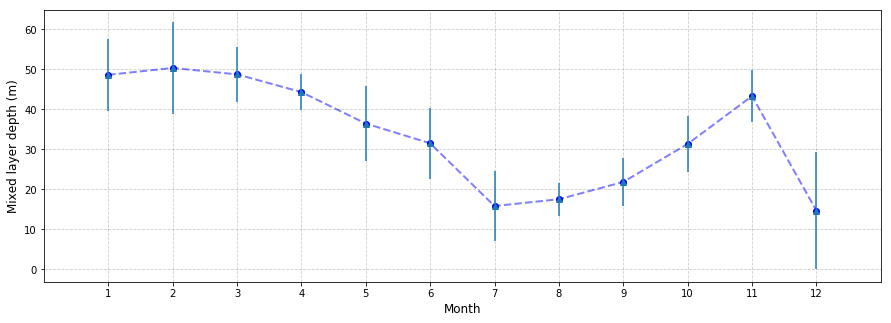

In [118]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y = [january, february, march, april, may, june, july, august, september,october,november,december]
e = [januarystd, februarystd, marchstd, aprilstd, maystd, junestd, julystd, auguststd, septemberstd,octoberstd,novemberstd,decemberstd]

plt.figure(figsize=(15, 5))
plt.xlim((0,13))
# plt.ylim((0,65))
plt.scatter(x, y, marker='o', c='blue')
plt.plot(x,y,linewidth = 2.0, linestyle = '--', c='blue', alpha = 0.5)
# # plt.title('Spring (AMJ) Mixed Layer Depth in Southern MAB', fontsize = 15)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Mixed layer depth (m)', fontsize = 12)
plt.grid(b=True, which='major', color='black', linestyle='--',alpha = 0.2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]) 
plt.errorbar(x, y, e, linestyle='None', marker='^')
# plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65])
plt.savefig('annualtrend_avgmonthly_timeseries_GB_withstd')
plt.show()